Import of the library. Matrixprofile folder must be loaded in the gDrive

In [7]:
pathToDrive = '/content/drive/MyDrive/'
import sys
sys.path.insert(1, pathToDrive)
from matrixprofile import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline


## Extract a single series from the Haptics training set of length seriesLength

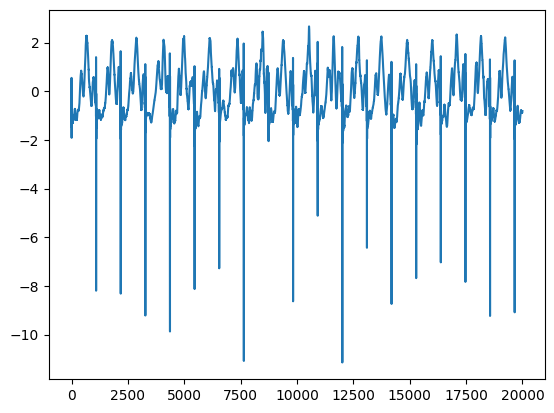

In [28]:
HapticsTS = pd.read_csv(os.path.join("/content/drive/MyDrive/data","Haptics","Haptics_TRAIN.tsv"),sep="\t", header=None)
HapticsTS = HapticsTS.drop(0, axis = 1)

seriesLength = 20000

##concatenate all the training set
singleSeriesHapticTraining20K = HapticsTS.values.ravel()[0:seriesLength]
plt.plot(singleSeriesHapticTraining20K)


### Exercice : Perform Motif discovery using Stomp.


1.   Try out several subsequence length.
2.   Try out several radius to discover different motif sets.
3.   What can we say?

The matrixporifle code and examples are here : https://github.com/target/matrixprofile-ts/blob/master/docs/examples/Motif%20Discovery.ipynb



In [29]:
m=32
mp = matrixProfile.stomp(singleSeriesHapticTraining20K,m)

In [33]:
def plot_motifs(mtfs, labels, ax):

    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + m,len(singleSeriesHapticTraining20K)-1) for s in starts]
        ax.plot(starts, singleSeriesHapticTraining20K[starts],  c +'o',  label=l)
        ax.plot(ends, singleSeriesHapticTraining20K[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+m),singleSeriesHapticTraining20K[nn:nn+m], c , linewidth=2)
        colori += 1

    ax.plot(singleSeriesHapticTraining20K, 'k', linewidth=1, label="data")
    ax.legend()


In [31]:
mtfs ,motif_d  = motifs.motifs(singleSeriesHapticTraining20K, mp, max_motifs=10)

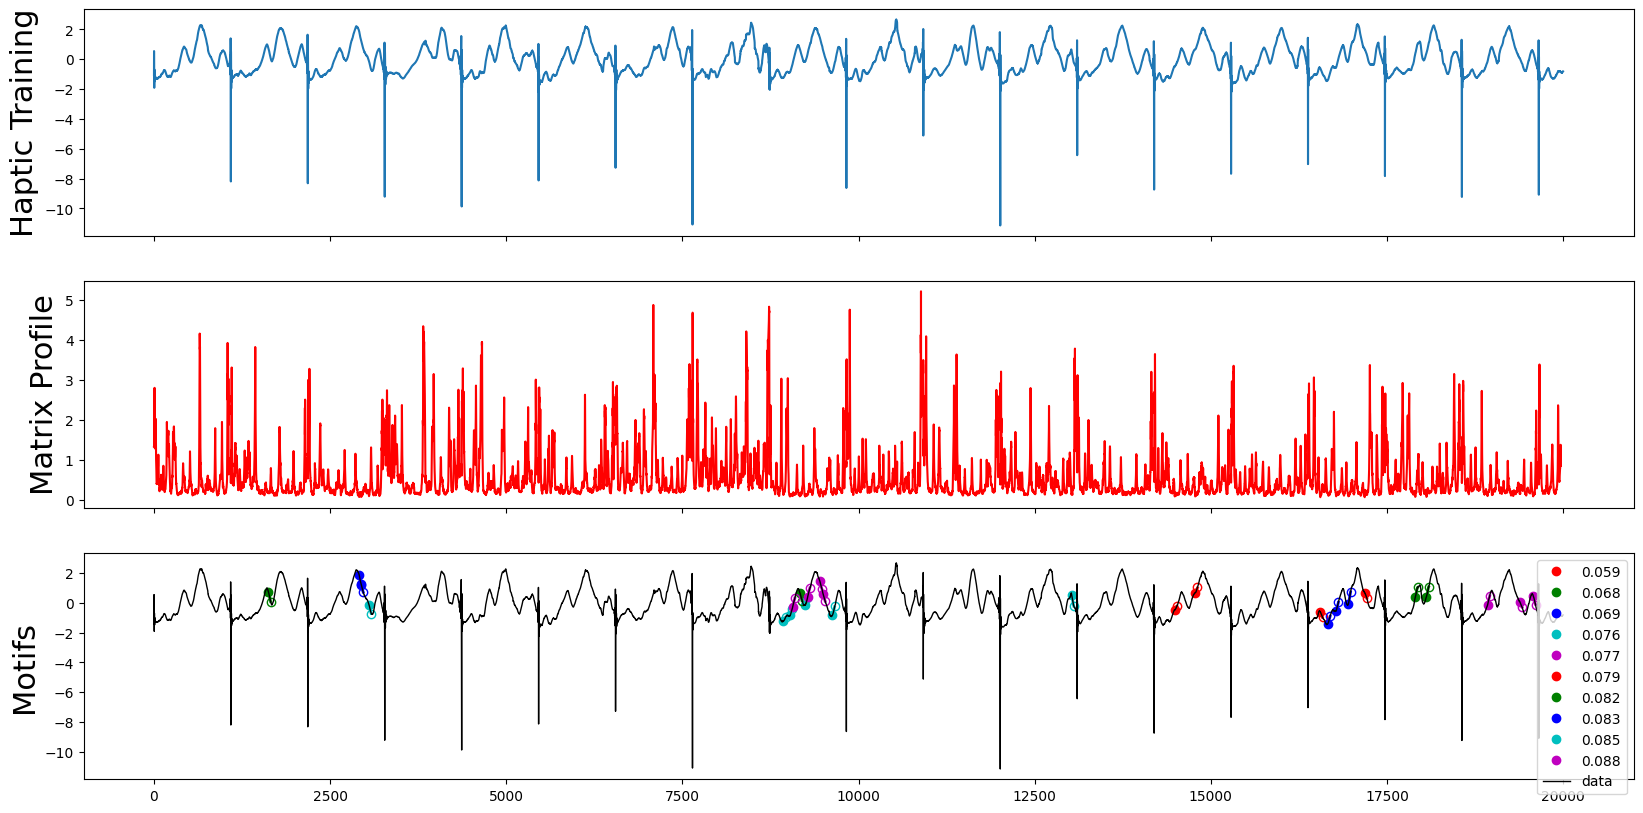

In [34]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(singleSeriesHapticTraining20K)),singleSeriesHapticTraining20K, label="Haptic Data")
ax1.set_ylabel('Haptic Training', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)

#Plot the Motifs
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Motifs', size=22)
#plt.xlim((0,100))
plt.show()